In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## 1) Preprocessing of the data

In [2]:
pwd

'c:\\Users\\admin\\Desktop\\Image_Classification\\model'

In [20]:
img= cv2.imread('./test_images/13.jpg')

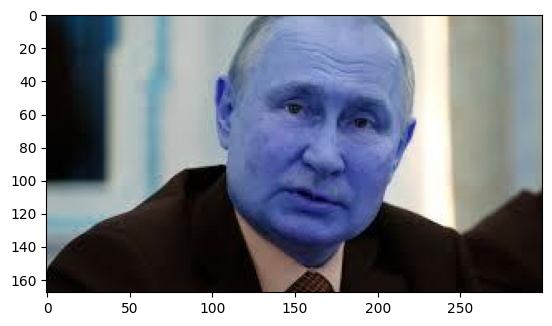

In [21]:
plt.imshow(img)

In [22]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

In [23]:
gray

array([[ 22,  22,  23, ..., 165, 165, 165],
       [ 21,  22,  22, ..., 165, 165, 165],
       [ 20,  20,  21, ..., 165, 165, 165],
       ...,
       [ 12,  12,  11, ...,   6,   6,   6],
       [ 13,  13,  12, ...,   6,   6,   6],
       [ 13,  13,  13, ...,   6,   6,   6]], dtype=uint8)

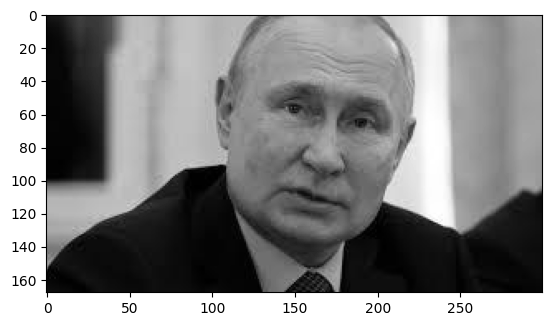

In [24]:
plt.imshow(gray, cmap= 'gray')

## Now, will apply haarcascade technique to detect 2 eyes and face

In [25]:
face_cascade= cv2.CascadeClassifier('C:/Users/admin/Desktop/Image_Classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/admin/Desktop/Image_Classification/model/opencv/haarcascades/haarcascade_eye.xml')

In [26]:
faces= face_cascade.detectMultiScale(gray,1.5,3)
faces

array([[108,  13, 122, 122]])

In [27]:
(x,y,w,h)= faces[0]
x,y,w,h

(108, 13, 122, 122)

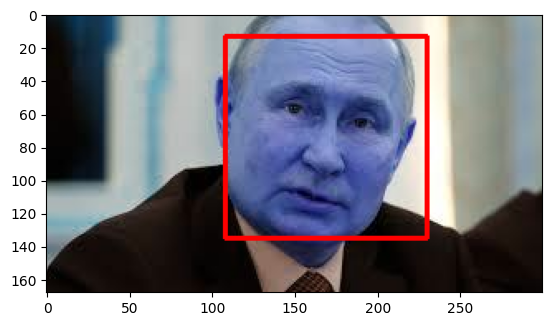

In [28]:
face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

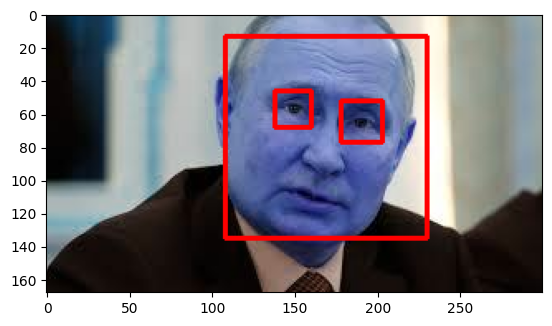

In [30]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img= cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= face_img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(255,0,0),2)

plt.figure()
plt.imshow(face_img, cmap= 'gray')
plt.show()

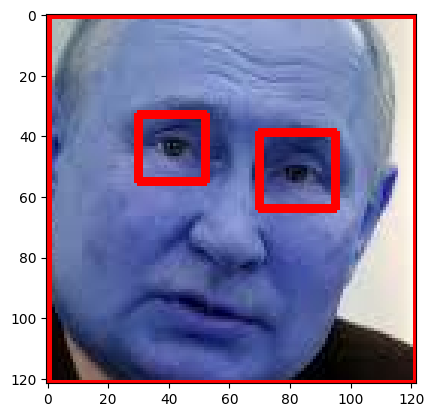

In [31]:
plt.imshow(roi_color, cmap= 'gray')

In [32]:
roi_color

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [173, 185, 185],
        ...,
        [242, 235, 220],
        [248, 241, 226],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [ 10,   5,   4],
        ...,
        [ 29,  20,  17],
        [ 30,  21,  18],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 10,   5,   4],
        ...,
        [ 27,  18,  15],
        [ 28,  19,  16],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [33]:
cropped_img= np.array(roi_color)
cropped_img.shape

(122, 122, 3)